In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [5]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [6]:
train=train.copy()
test=test.copy()

In [7]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [9]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [11]:
train.shape

(8523, 12)

In [12]:
test.shape

(5681, 11)

In [13]:
data=pd.concat([train,test]) #joining train and test through concat

In [14]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
data.shape

(14204, 12)

In [16]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Data Visualization

<function matplotlib.pyplot.show(*args, **kw)>

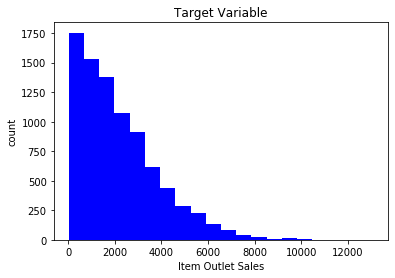

In [17]:
plt.hist(train['Item_Outlet_Sales'],bins=20 , color = "blue")
plt.title('Target Variable')
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show

In [18]:
train.columns #total no. of columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [19]:
train.dtypes # data types 

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [20]:
train['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
NCL31     9
FDX20     9
NCQ06     9
         ..
FDE52     1
FDK57     1
FDT35     1
FDY43     1
FDN52     1
Name: Item_Identifier, Length: 1559, dtype: int64

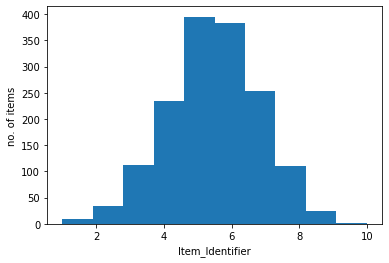

In [21]:
train['Item_Identifier'].value_counts(normalize=True)
train['Item_Identifier'].value_counts().plot.hist()
plt.xlabel('Item_Identifier')
plt.ylabel('no. of items')
plt.show()

In [22]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

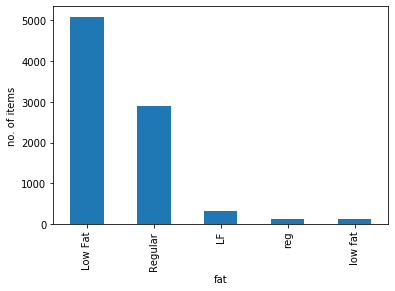

In [23]:
train['Item_Fat_Content'].value_counts(normalize=True)
train['Item_Fat_Content'].value_counts().plot.bar()
plt.xlabel('fat')
plt.ylabel('no. of items')
plt.show()

In [24]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

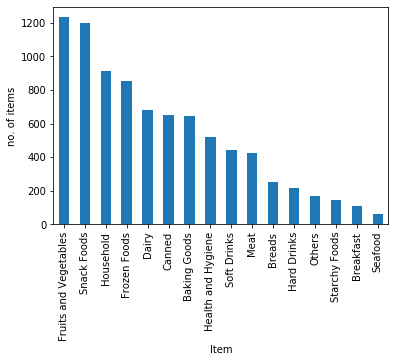

In [25]:
train['Item_Type'].value_counts(normalize=True)
train['Item_Type'].value_counts().plot.bar()
plt.xlabel('Item')
plt.ylabel('no. of items')
plt.show()

In [26]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

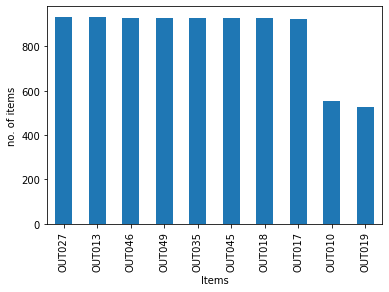

In [27]:
train['Outlet_Identifier'].value_counts()
train['Outlet_Identifier'].value_counts().plot.bar()
plt.xlabel('Items')
plt.ylabel('no. of items')
plt.show()

In [28]:
train['Outlet_Size'].value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

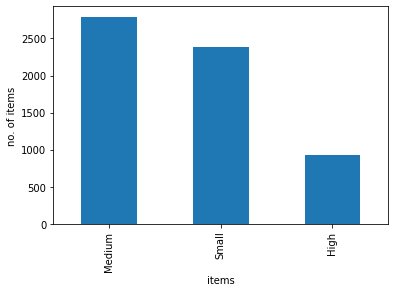

In [29]:
train['Outlet_Size'].value_counts()
train['Outlet_Size'].value_counts().plot.bar()
plt.xlabel('items')
plt.ylabel('no. of items')
plt.show()

In [30]:
train['Outlet_Location_Type'].value_counts()


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

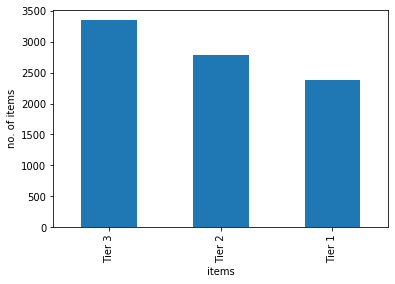

In [31]:
train['Outlet_Location_Type'].value_counts()
train['Outlet_Location_Type'].value_counts().plot.bar()
plt.xlabel('items')
plt.ylabel('no. of items')
plt.show()

In [32]:
train['Outlet_Type'].value_counts()


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

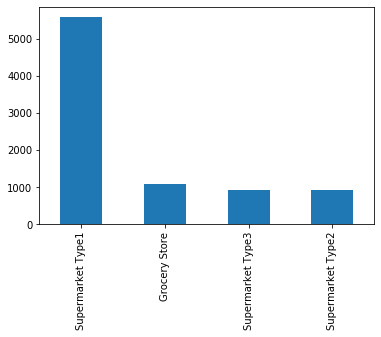

In [33]:
train['Outlet_Type'].value_counts()
train['Outlet_Type'].value_counts().plot.bar()


# Data Pre-Processing

In [34]:
data.apply(lambda x: len(x.unique()))  # unique value in columns

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [35]:
data.isnull().sum()  # Finding null values in columns

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [36]:
# replacing null values 

data["Item_Weight"]=data['Item_Weight'].replace(0,np.NaN)
data["Item_Weight"].fillna(data['Item_Weight'].mean(),inplace=True)

data['Outlet_Size']=data['Outlet_Size'].replace(0,np.NaN)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

data['Item_Outlet_Sales']=data['Item_Outlet_Sales'].replace(0,np.NaN)
data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].mean(), inplace=True)

In [37]:
data.isnull().sum() 

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [38]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [39]:
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Identifier'] = data['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})
data['Item_Identifier'].value_counts()

Food              10201
Non_Consumable     2686
Drinks             1317
Name: Item_Identifier, dtype: int64

In [40]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [41]:
data['Outlet_Type'].value_counts()


Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

# Label encoder

In [42]:
# label encoding

data.apply(LabelEncoder().fit_transform)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,284,0,1097,4,7567,9,4,1,0,1,2541
1,0,57,1,1436,14,632,3,8,1,2,2,422
2,1,376,0,1172,10,3897,9,4,1,0,1,1639
3,1,393,1,0,6,5626,0,3,1,2,0,670
4,2,265,0,0,9,848,1,1,0,2,1,865
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,1,298,1,718,13,3881,8,2,2,0,1,1692
5677,1,180,1,11820,15,5069,3,8,1,2,2,1692
5678,2,293,0,8009,8,3196,7,5,1,1,1,1692
5679,1,354,1,0,3,6626,2,7,1,1,1,1692


In [43]:
data = pd.get_dummies(data)
data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_Drinks,Item_Identifier_Food,Item_Identifier_Non_Consumable,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.138000,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.422800,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.270000,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.380000,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.705200,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.50,0.013496,141.3154,1997,2181.288914,0,1,0,0,1,...,0,0,1,1,0,0,0,1,0,0
5677,7.60,0.142991,169.1448,2009,2181.288914,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5678,10.00,0.073529,118.7440,2002,2181.288914,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
5679,15.30,0.000000,214.6218,2007,2181.288914,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [44]:
data.shape

(14204, 46)

# Modelling

In [45]:
# splitting the data into dependent and independent variables
X=data.drop('Item_Outlet_Sales',axis=1)
Y=data.Item_Outlet_Sales

print(X.shape)
print(Y.shape)


(14204, 45)
(14204,)


In [46]:
# making x_train, x_test, y_train, y_test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=101)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(9942, 45)
(9942,)
(4262, 45)
(4262,)


In [48]:
#AdaboostRegression 

model= AdaBoostRegressor(n_estimators = 100)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print("RMSE :", np.sqrt(mse))
print(Y_pred)

score=cross_val_score(model,X,Y,cv=5)
print(score)

RMSE : 1166.6178895439837
[2780.77671207 1435.95218937 2420.91400857 ... 2780.77671207 1704.45796731
 3028.1650275 ]
[ 4.75338066e-01  4.84530014e-01  4.96986704e-01 -7.45953763e+30
 -7.11170648e+30]


In [49]:
#GradientBoostingRegression

model = GradientBoostingRegressor()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
print(Y_pred)

# Calculating the root mean squared error
print("RMSE :", np.sqrt(((Y_test - Y_pred)**2).sum()/len(Y_test)))

[2426.57382221 1162.89708126 2073.29939852 ... 2383.61170872 1879.94078609
 2371.32748589]
RMSE : 1062.723847348548


In [50]:
# RandomForestRegression

model = RandomForestRegressor(n_estimators = 100)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
print(Y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(Y_test, Y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

print("Result :",model.score(X_train, Y_train))

[2315.80966879 1810.180942   2005.84904106 ... 2243.70710034 1864.54886933
 2514.75121343]
RMSE : 1117.6433329358974
Variance score: 0.29
Result : 0.8992529459423301


In [51]:
#DecisionTreeRegression

model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

# predicting the test set results
Y_pred = model.predict(X_test)
print(Y_pred)

print(" RMSE : " , np.sqrt(((Y_test - Y_pred)**2).sum()/len(Y_test)))

[3900.9222     2181.28891358 2181.28891358 ... 2227.101      2049.3324
 2708.4744    ]
 RMSE :  1537.8126388759426


In [53]:
#SVR


model = SVR()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
print(Y_pred)

#cross validation
score=cross_val_score(model,X,Y,cv=5)
print('mean score',score.mean())
print('sd',score.std())

#cross prediction
pred=cross_val_predict(model,X,Y,cv=5)
print(pred)

# Calculating the RMSE Score
mse = mean_squared_error(Y_test, Y_pred)
print("RMSE :", np.sqrt(mse))


mean score -6.899996939392567e+25
sd 8.452821678456282e+25
[2181.25155307 2181.05692121 2181.18587069 ... 2181.25278597 2181.12904222
 2181.27694803]
[2181.41241002 2181.11239392 2181.25520813 ... 2175.9976421  2183.49086984
 2172.94708942]
RMSE : 1328.7607068520322
